In [5]:
import json
import torch
import numpy as np
import cv2

from osgeo import gdal, gdalconst, ogr
from tqdm import tqdm
import matplotlib.pyplot as plt

from util import pointsAsPixels

# no filter

100%|██████████| 856/856 [00:00<00:00, 30662.68it/s]


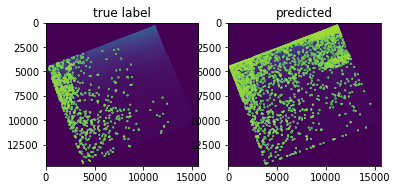

In [4]:
# test_imagefile_path = "sample/all_images/S1A_EW_GRDM_1SDH_20230212T135259_06D2_S_1.tif/S1A_EW_GRDM_1SDH_20230212T135259_06D2_S_1.tif"
# test_shapefile_path = "sample/all_shapes/S1A_EW_GRDM_1SDH_20230212T135259_20230212T135341_047203_05A9F4_06D2/S1A_EW_GRDM_1SDH_20230212T135259_20230212T135341_047203_05A9F4_06D2.shp"
test_imagefile_path = "sample/all_images/S1A_EW_GRDM_1SDH_20230118T131123_84EF_S_1.tif/S1A_EW_GRDM_1SDH_20230118T131123_84EF_S_1.tif"
test_shapefile_path = "sample/all_shapes/S1A_EW_GRDM_1SDH_20230118T131123_20230118T131232_046838_059DBE_84EF/S1A_EW_GRDM_1SDH_20230118T131123_20230118T131232_046838_059DBE_84EF.shp"

ds = gdal.Open(test_imagefile_path, gdalconst.GA_ReadOnly)
gt = ds.GetGeoTransform()

img = np.asarray(ds.GetRasterBand(1).ReadAsArray())
py, px = pointsAsPixels(test_shapefile_path, gt)

height, width = img.shape
true_labels = np.zeros(img.shape, dtype=np.uint8)

for i in tqdm(range(len(py)), total=len(py)):
    true_labels[max(round(px[i])-15, 0):min(round(px[i])+15, height), max(round(py[i])-15, 0):min(round(py[i])+15, width)] = 1

    
    
pred_labels = np.zeros(img.shape, dtype=np.uint8)
with open("84EF_output_no_filter.json", "r") as f:
    predicted = json.load(f)
with open("84EF_test_image_position_no_filter.json", "r") as f:
    predicted_position = json.load(f)

for i in range(len(predicted)):
    w1 = predicted_position[i][0]
    w2 = predicted_position[i][1]
    h1 = predicted_position[i][2]
    h2 = predicted_position[i][3]
    pred_labels[w1:w2, h1:h2] = predicted[i]
    
    
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(img)
ax1.contour(true_labels)
plt.title("true label")

ax2 = fig.add_subplot(122)
ax2.imshow(img)
ax2.contour(pred_labels)
plt.title("predicted")

plt.savefig("no_filter.png")



# mean filter

100%|██████████| 856/856 [00:00<00:00, 30734.34it/s]


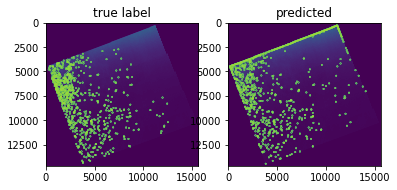

In [6]:
test_imagefile_path = "sample/all_images/S1A_EW_GRDM_1SDH_20230118T131123_84EF_S_1.tif/S1A_EW_GRDM_1SDH_20230118T131123_84EF_S_1.tif"
test_shapefile_path = "sample/all_shapes/S1A_EW_GRDM_1SDH_20230118T131123_20230118T131232_046838_059DBE_84EF/S1A_EW_GRDM_1SDH_20230118T131123_20230118T131232_046838_059DBE_84EF.shp"

ds = gdal.Open(test_imagefile_path, gdalconst.GA_ReadOnly)
gt = ds.GetGeoTransform()

img = np.asarray(ds.GetRasterBand(1).ReadAsArray())
py, px = pointsAsPixels(test_shapefile_path, gt)

height, width = img.shape
true_labels = np.zeros(img.shape, dtype=np.uint8)

for i in tqdm(range(len(py)), total=len(py)):
    true_labels[max(round(px[i])-15, 0):min(round(px[i])+15, height), max(round(py[i])-15, 0):min(round(py[i])+15, width)] = 1

    
    
pred_labels = np.zeros(img.shape, dtype=np.uint8)
with open("84EF_output_mean_filter.json", "r") as f:
    predicted = json.load(f)
with open("84EF_test_image_position_mean_filter.json", "r") as f:
    predicted_position = json.load(f)

for i in range(len(predicted)):
    w1 = predicted_position[i][0]
    w2 = predicted_position[i][1]
    h1 = predicted_position[i][2]
    h2 = predicted_position[i][3]
    pred_labels[w1:w2, h1:h2] = predicted[i]
    
    
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(img)
ax1.contour(true_labels)
plt.title("true label")

ax2 = fig.add_subplot(122)
ax2.imshow(img)
ax2.contour(pred_labels)
plt.title("predicted")

plt.savefig("mean_filter.png")

# Gaussian filter

100%|██████████| 856/856 [00:00<00:00, 30809.51it/s]


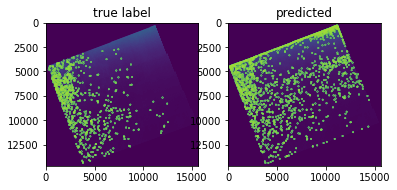

In [7]:
test_imagefile_path = "sample/all_images/S1A_EW_GRDM_1SDH_20230118T131123_84EF_S_1.tif/S1A_EW_GRDM_1SDH_20230118T131123_84EF_S_1.tif"
test_shapefile_path = "sample/all_shapes/S1A_EW_GRDM_1SDH_20230118T131123_20230118T131232_046838_059DBE_84EF/S1A_EW_GRDM_1SDH_20230118T131123_20230118T131232_046838_059DBE_84EF.shp"

ds = gdal.Open(test_imagefile_path, gdalconst.GA_ReadOnly)
gt = ds.GetGeoTransform()

img = np.asarray(ds.GetRasterBand(1).ReadAsArray())
py, px = pointsAsPixels(test_shapefile_path, gt)

height, width = img.shape
true_labels = np.zeros(img.shape, dtype=np.uint8)

for i in tqdm(range(len(py)), total=len(py)):
    true_labels[max(round(px[i])-15, 0):min(round(px[i])+15, height), max(round(py[i])-15, 0):min(round(py[i])+15, width)] = 1

    
    
pred_labels = np.zeros(img.shape, dtype=np.uint8)
with open("84EF_output_gaussian_filter.json", "r") as f:
    predicted = json.load(f)
with open("84EF_test_image_position_gaussian_filter.json", "r") as f:
    predicted_position = json.load(f)

for i in range(len(predicted)):
    w1 = predicted_position[i][0]
    w2 = predicted_position[i][1]
    h1 = predicted_position[i][2]
    h2 = predicted_position[i][3]
    pred_labels[w1:w2, h1:h2] = predicted[i]
    
    
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(img)
ax1.contour(true_labels)
plt.title("true label")

ax2 = fig.add_subplot(122)
ax2.imshow(img)
ax2.contour(pred_labels)
plt.title("predicted")

plt.savefig("gaussian_filter.png")